In [13]:
from tensorflow.keras.models import load_model

# Load the model from the .h5 file
loaded_model = load_model('vehicle_detection_model.h5')
print("Model loaded from 'vehicle_detection_model.h5'")

Model loaded from 'vehicle_detection_model.h5'


In [14]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 54, 54, 64)        0

1/1 [==============================] - 0s 224ms/step
The image is predicted as: Car


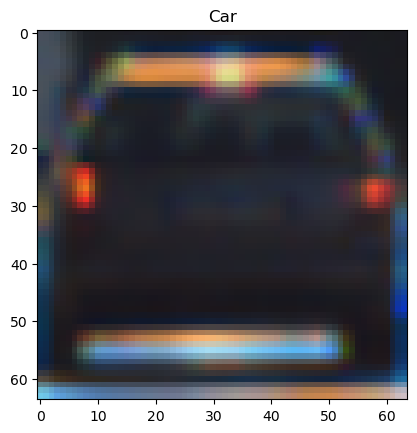

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def preprocess_image(img_path):
    # Load the image
    img = cv2.imread(img_path)
    
    # Check if the image was successfully loaded
    if img is None:
        raise FileNotFoundError(f"Image at path '{img_path}' not found.")
    
    # Resize the image
    img = cv2.resize(img, (224, 224))
    
    # Normalize the image
    img = np.expand_dims(img, axis=0) / 255.0
    
    return img

def predict_vehicle(model, img_path):
    # Preprocess the image
    img = preprocess_image(img_path)
    
    # Make prediction
    prediction = model.predict(img)
    
    # Return result
    return 'Car' if np.argmax(prediction) == 1 else 'Non-car'

# Test on a new image
test_img_path = os.path.join(vehicle_folder, '10.png')  # Corrected test image path
result = predict_vehicle(loaded_model, test_img_path)
print(f'The image is predicted as: {result}')

# Display the test image with prediction
img = cv2.imread(test_img_path)
if img is not None:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(result)
    plt.show()
else:
    print(f"Image at path '{test_img_path}' not found, so it cannot be displayed.")